결정 트리

In [1]:
#p106
from sklearn.linear_model import LinearRegression, LogisticRegression # 예측용/분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #분류용/예측용

In [6]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
# cancer = load_breast_cancer()
cancer = load_iris()
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, stratify = cancer.target,  random_state=42)
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [82]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9642857142857143, 0.8947368421052632)

In [83]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [84]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

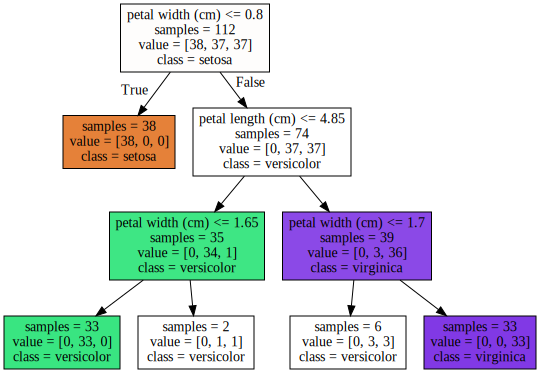

In [85]:
import graphviz  #설치  pip install graphviz   https://graphviz.gitlab.io/_pages/Download/Download_windows.html
with open ('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [87]:
import pandas as pd

In [92]:
df = pd.DataFrame(data=[[1,2,'man'],[2,3,'woman']],columns=['a','b','c'])
df

,a,b,c
0,1,2,man
1,2,3,woman


man은 1로 ,woman 은 0으로 변환하면 안되요?
 - man + man = 2 ?
 - man과 woman의 중간은? (1+0)/2 = 0.5

In [91]:
df.dtypes

a     int64
b     int64
c    object
dtype: object

In [93]:
pd.get_dummies(df)


,a,b,c_man,c_woman
0,1,2,1,0
1,2,3,0,1


- 시간은 범주(o) / 연속 : 0시~24시
    - 1시<2시, 24시>1시, 설명이 안됨
- 연도는 범주/ 연속 2000년, 2001년 2000년은 1000년과 3000년
- 사람의 키 -연속
- 사람의 나이 -연속, (미성년자, 성년) : 범주